# Assignment 2

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning sessions. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Import specific objects
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

### Question 1: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may use `Caravan.describe()` to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [284]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')

# Add your code here
Caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print` and `describe`):  
#### _(i)_ How many observations (rows) does the dataset contain?    
5822
#### _(ii)_ How many variables (columns) does the dataset contain?    
86
#### _(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable? 
* Purchase variable type: "categorical variable" or "factor"
* Purchase variable levels: ['No' 'Yes']
#### _(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?  
85

In [285]:
# Add your code here
purchase_distribution = Caravan["Purchase"].value_counts()
purchase_type = Caravan["Purchase"].dtype
purchase_levels = Caravan["Purchase"].unique()

# Print results
print("Number of observations (rows): ", Caravan.shape[0])
print("Number of variables (columns): ", Caravan.shape[1], end="\n\n")
print(purchase_distribution, end="\n\n")
print("Purchase variable type:", purchase_type)
print("Purchase variable levels:", purchase_levels, end="\n\n")
df = pd.DataFrame(Caravan)
df.head(10)


Number of observations (rows):  5822
Number of variables (columns):  86

Purchase
No     5474
Yes     348
Name: count, dtype: int64

Purchase variable type: object
Purchase variable levels: ['No' 'Yes']



,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
7,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No
8,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,No


Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scaler` method, provided as follows:

In [286]:
# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...   ALEVEN  APERSONG   AGEZONG  AWAOREG  \
0 -0.068711 -0.161816  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   
1 -0.068711  0.464159 -0.096077  ... -0.20291 -0.073165 -0.081055 -0.05992   
2  0.914172  0.464159 -1.667319  ... -0.20291 -0.073165 -0.081055 -0.05992   
3  0.914172  0.464159 -0.619824  ... -0.20291 -0.073165 -0.081055 -0.05992   
4 -0.068711  0.464159  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   

     ABRAND   AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  
0  0.764971 -0.02

#### _(v)_ Why is it important to standardize the predictor variables?  
`Because, turn numerical data into a consistent range. Models work best when their features have small values with similar ranges.`

`Standardization creates a level playing field for all features, ensuring they contribute fairly to the KNN distance metric and ultimately leading to more accurate and efficient neighbor identification and classification.`
#### _(vi)_ Why did we elect not to standard our response variable `Purchase`?  
`Standardization isn't applied to the response variable (Purchase) in KNN for two key reasons:`

* `KNN relies on distances between data points for classification. Since the response variable is likely already binary (Yes/No), standardizing it wouldn't change the distances between points. The difference between "Yes" and "No" remains constant regardless of standardization.`

* `KNN interprets the response variable categories directly (Yes/No) as class labels. Standardization would convert these categories to a new scale, making the model's predictions difficult to understand. For example, a prediction of 0.7 on the standardized scale wouldn't tell you definitively whether it translates to "Yes" or "No" for the purchase decision.`

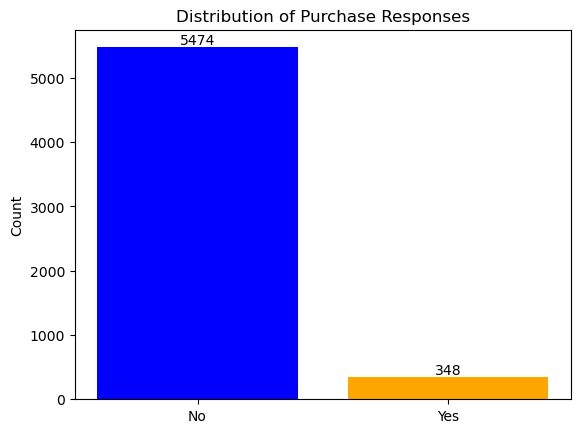

In [287]:
import matplotlib.pyplot as plt

labels = purchase_distribution.index.tolist()
sizes = purchase_distribution.values.tolist()
colors = ['blue', 'orange']  # Colors for 'No' and 'Yes'
plt.bar(labels, sizes, color=colors)
for index, value in enumerate(sizes):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('Distribution of Purchase Responses')
plt.show()


#### _(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). 
##### Why is setting a seed important? 
For instance, KNN might randomly split the data into training and testing sets. Setting a seed ensures that whenever you run your code again with the same seed value, the same sequence of random numbers will be generated.

Some KNN implementations might use randomness for tie-breaking scenarios (when multiple neighbors have the same distance to a new data point). Setting a seed ensures this tie-breaking happens consistently across different runs of your experiment.
##### Is the particular seed value important? Why or why not?
No, seed value is not important, as long as the value is consistent (same value) throughout the experiment.  I use 42: Referencing "The Hitchhiker's Guide to the Galaxy"

In [288]:
# Add your code here
import random
random.seed(42)

#### _(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables.

* import train_test_split from sklearn.model_selection

In [289]:
# Create a random vector of True and False values
#split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
#training_X = predictors_standardized[split]

# Define the training set for Y (response)
#training_Y = Caravan.loc[split, 'Purchase']

# Define the testing set for X (predictors)
#testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
#testing_Y = Caravan.loc[~split, 'Purchase']

In [290]:
from sklearn.model_selection import train_test_split

training_X, testing_X, training_y, testing_y = train_test_split(predictors_standardized, Caravan['Purchase'], test_size=0.25, random_state=42)

#### _(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. 
* Fit the KNN with k=1. (You may review arguments to knn by typing `help(knn.fit)`). 

In [291]:
# Add your code here
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN model with k=1 neighbor
knn_model = KNeighborsClassifier(n_neighbors=1)
help(knn_model.fit)


Help on method fit in module sklearn.neighbors._classification:

fit(X, y) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Fit the k-nearest neighbors classifier from the training dataset.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) or                 (n_samples, n_samples) if metric='precomputed'
        Training data.
    
    y : {array-like, sparse matrix} of shape (n_samples,) or                 (n_samples, n_outputs)
        Target values.
    
    Returns
    -------
    self : KNeighborsClassifier
        The fitted k-nearest neighbors classifier.



In [292]:
# Fit the model on the training data
knn_model.fit(training_X, training_y)
predict_y = knn_model.predict(testing_X.values)

#### Using your fit model, answer the following questions:   
### _(x)_ What is the prediction accuracy? (Hint: use the `score` method, and compare your model to `testing_Y`) 
* Accuracy using score method: 0.8846153846153846
#### _(xi)_ What is the predictor error ? (Hint: compute it from the accuracy)
* Error rate: 0.11538461538461542

In [293]:
# prediction accuracy rate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_Y, predict_y)
print("Accuracy:", accuracy)

Accuracy: 0.8846153846153846


In [294]:
# prediction error rate
error_rate = 1 - accuracy
print("Error rate:", error_rate)

Error rate: 0.11538461538461542


#### _(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:
Model Accuracy (88.46%) vs. Random Guessing (5.98%): 

The model significantly outperforms random guessing. A random guess would only predict "Yes" (purchase) 5.98% of the time, matching the actual purchase rate in the dataset. This indicates that the KNN model with k=1 is able to learn patterns from the data and make predictions that are much better than simply guessing based on the overall purchase rate.

In [295]:
# Calculate the percentage of customers who purchase insurance
percentage_purchase = (Caravan['Purchase'].eq('Yes').sum() / len(Caravan['Purchase'])) * 100

print(percentage_purchase)

5.977327378907591


#### _(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?
* Model with K = 3 have a higher accuracy, using score method: 0.9141483516483516

In [296]:
# Your code here
knn_model_2 = KNeighborsClassifier(n_neighbors=3)
knn_model_2.fit(training_X, training_y)
predict_y_2 = knn_model_2.predict(testing_X.values)
accuracy2 = accuracy_score(testing_Y, predict_y_2)
print("Accuracy with K = 3, using score method:", accuracy2)

Accuracy with K = 3, using score method: 0.9141483516483516


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Classification using KNN|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
